## Importing the Dataset from kaggle.The dataset that was merged from 2 datasets is uploaded to kaggle dataset repository

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'test-external:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4467403%2F7667683%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240420%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240420T154500Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc77025ab0b5237ffe60406978da52f28d0b08d7a671df952f3ab29431d7c5beeda298ac7e5a9c05893438be00c4754f0d76ecd64546c70ded4c6f6a9b3052d071ebc3cb98501c516ba93271e6a5914a0a7764ac5835b4d4298786c032fbac5e7aa386c39a1fe4e804ccdc26f2501171d8674e2bc3abdc873c9bcaa10f1d41908baa3b7c6508a6c99e2faa50f8f4dc0128ba68f11fa50e571dee7c807e8ee580ed91ef768ac833a98de58db80dcd36a0ac3042d4cde35c46638e1abdb8b1a2b67bfad31f30488de3a2982402e5677504d5217d9d7e61a7c9d17c04665b302f65763cba8eca02d68af07217d7f5496639081af56db984a89c43ff43719f0f1e05a,myfruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4595922%2F7975844%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240420%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240420T154501Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2b03fc0cb8c1b2d10b5a946f7b869b27d1d3b09280a74c02cde13db579b7a0e38a547d3fe5dce776fb78e439da2a7306930e24a63501edcd3f4590116e6aa5635eb88a9e4201bafe547e311215d31f8d01066adcb48c3dc15103a122f019524ab8500602b5c8f07e2364a40764c7553c2311d670887c8bdc015179bb62c8501d5592e819ae3476a36b70ca83a816c02c4357527188bcdb65811d239ee4430ed40e313841a013f81e24a700df457080ec575bba2810cf5ec7eff7fd2ab465ce002a96c7c9be50c443ab890b944d75b565b8ee81d17f09fd4f2498db16433fe3ab698548d20f33b2ff501d5437d03900c20eeb109f146aa5093171fe188efd8d0f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 4456472 bytes downloaded
Downloaded and uncompressed: test-external
[==================================================] 3662874560 bytes downloaded
Downloaded and uncompressed: myfruits
Data source import complete.


Mounting the google drive to save or load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <a id='step1'></a>
## <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b>Step 1 | <b></span><span style="color:white"><b>Python Libraries</b></span></div>

## <a id='step11'></a>
## <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 1.1 | <b></span><span style="color:#368F8B"><b>Import libraries</b></span></span>

In [ ]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
from keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

## <a id='step2'></a>
## <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b>Step 2 | <b></span><span style="color:white"><b>Data</b></span></div>

## <a id='step21'></a>
## <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.1 | <b></span><span style="color:#368F8B"><b>Import Data</b></span></span>

In [ ]:
base_dir = '/kaggle/input/myfruits/Merged_Dataset_v2/'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
#test_dir = os.path.join(base_dir, 'test-multiple_fruits')

In [ ]:
validation_dir

'/kaggle/input/myfruits/Merged_Dataset_v2/test'

## <a id='step22'></a>
## <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.2 | <b></span><span style="color:#368F8B"><b>Count data and classes</b></span></span>

In [ ]:
def num_of_classes(folder_dir, folder_name) :
    classes = [class_name for class_name in os.listdir(train_dir)]
    print(colored(f'number of classes in {folder_name} folder : {len(classes)}', 'blue', attrs=['bold']))

In [ ]:
num_of_classes(train_dir, 'train')
num_of_classes(validation_dir, 'test')
#num_of_classes(test_dir, 'test')

number of classes in train folder : 53
number of classes in test folder : 53


In [ ]:
# work on train folder and count number of samples per each class

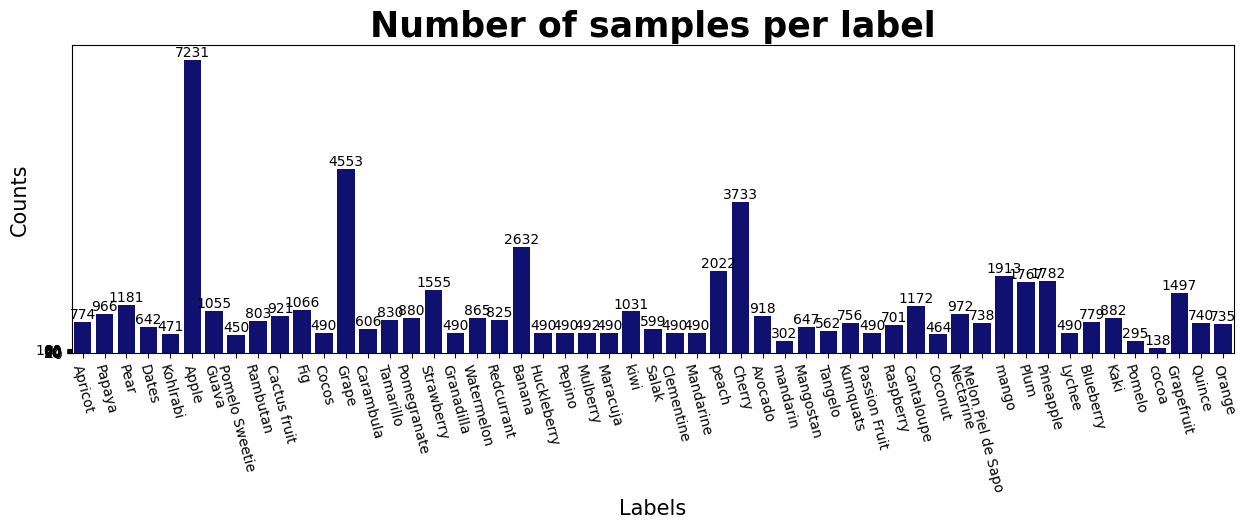

In [ ]:
classes = [class_name for class_name in os.listdir(train_dir)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(train_dir, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='navy')
plt.xticks(rotation=285)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 105, 10))
plt.show()

## <a id='step23'></a>
## <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.3 | <b></span><span style="color:#368F8B"><b>Convert data to a DataFrame</b></span></span>

In [ ]:
# A function to return DataFrame

def create_df(folder_path) :
    all_images = []
    for class_name in classes :
        class_path = os.path.join(folder_path, class_name)
        all_images.extend([(os.path.join(class_path, file_name), class_name) for file_name in os.listdir(class_path)])
    df = pd.DataFrame(all_images, columns=['file_path', 'label'])
    return df

In [ ]:
train_df = create_df(train_dir)
validation_df = create_df(validation_dir)
#test_df = create_df(test_dir)

In [ ]:
print(colored(f'Number of samples in train : {len(train_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples in validation : {len(validation_df)}', 'blue', attrs=['bold']))
#print(colored(f'Number of samples test : {len(test_df)}', 'blue', attrs=['bold']))

Number of samples in train : 58353
Number of samples in validation : 19713


# Show an image per each class(label)

## <a id='step24'></a>
## <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.4 | <b></span><span style="color:#368F8B"><b>Randomly Show an image per each class(label)</b></span></span>

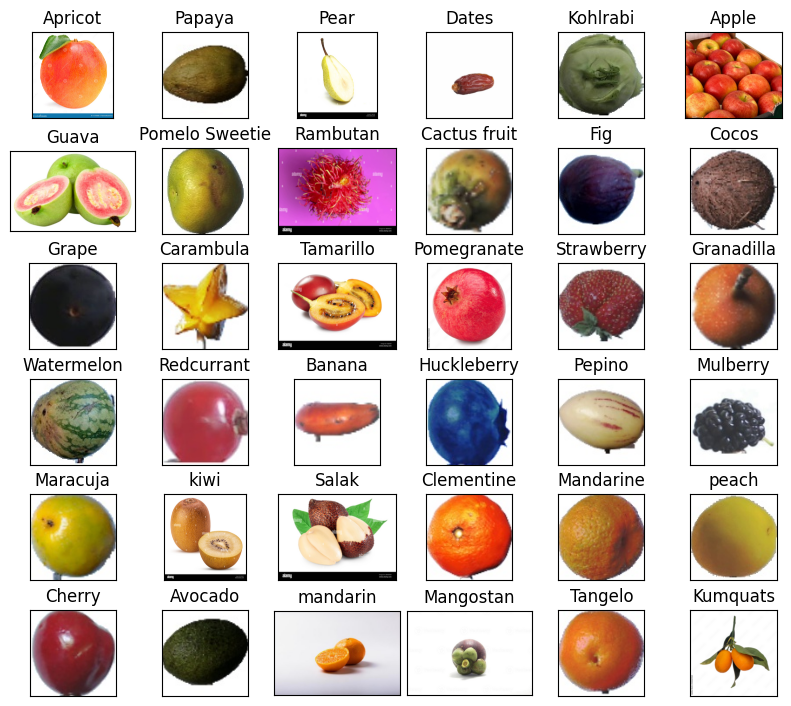

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.file_path[i]))
    ax.set_title(df_unique.label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

## <a id='step25'></a>
## <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.5 | <b></span><span style="color:#368F8B"><b>Data generators</b></span></span>

Data augmentation to avoid over fitting and achive better performance.

In [ ]:
# Train generator

train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Scaled images in range 0 to 1
    rotation_range=20,              # Rorate images by factor 20 degree
    width_shift_range=0.2,          # Shift images horizontally by up to 20% of their width
    height_shift_range=0.2,         # Shift images vertically by up to 20% of their width
    zoom_range=0.1,                 # Zoom in and out images by 10%
    horizontal_flip=True,           # Allow horizontal flipping
    shear_range=0.1,                # shear images by 10% their size
    fill_mode='nearest',            # fill unlocated pixels by nearest pixel
    )

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,             # Target data
    x_col='file_path',              # X column
    y_col='label',                  # y column
    target_size=(224, 224),         # Resize images  to
    color_mode='rgb',               # Color mode
    class_mode='categorical',       # type of model
    batch_size=32,
    shuffle=True,
    seed=42,

)

Found 58353 validated image filenames belonging to 53 classes.


In [ ]:
# validation generator

validation_datagen = ImageDataGenerator(rescale=1./255,)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=True
)

Found 19713 validated image filenames belonging to 53 classes.


## <a id='step3'></a>
## <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b>Step 3 | <b></span><span style="color:white"><b>Modeling</b></span></div>

## <a id='step31'></a>
## <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1 | <b></span><span style="color:#368F8B"><b>Add MobileNetV2 model</b></span></span>

In [ ]:
pre_trained_model = MobileNetV2(
    input_shape=(224, 224, 3),            # Input image size
    include_top=False,                    # model not include top layer
    weights='imagenet',                   # weights type
    pooling='avg'                         # type of pooling layer
)

9406464/9406464 [==============================] - 0s 0us/step


## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2 | <b></span><span style="color:#368F8B"><b>Freeze MobileNetV2 layers</b></span></span>

In [ ]:
# Name of layers in MobileNetV2
for layer in pre_trained_model.layers :
    print(layer.name)

input_1
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_expand

In [ ]:
# Freeze all layers, except last layer

pre_trained_model.trainable = True
set_trainable = False

for layer in pre_trained_model.layers :
    if layer.name == 'block_16_expand' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

## <a id='step33'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.3 | <b></span><span style="color:#368F8B"><b>Define a model</b></span></span>

In [ ]:
# Add custom layers on top of the base model
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(53, activation='softmax'))

## <a id='step34'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.4 | <b></span><span style="color:#368F8B"><b>Model Diagram</b></span></span>

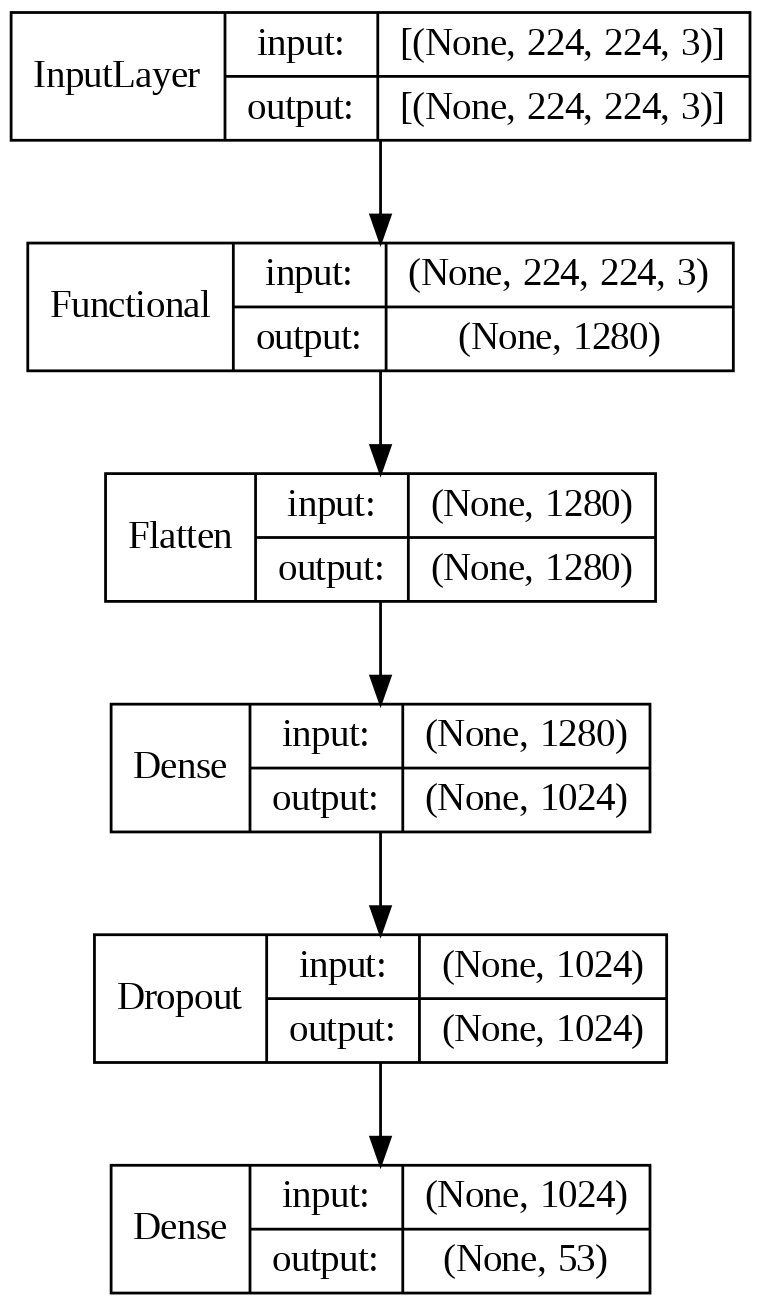

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False, dpi=200)

In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 53)                54325     
                                                                 
Total params: 3624053 (13.82 MB)
Trainable params: 2252149 (8.59 MB)
Non-trainable params: 1371904 (5.23 MB)
_____________

## <a id='step35'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.5 | <b></span><span style="color:#368F8B"><b>Compile Model</b></span></span>

In [ ]:
# Compile
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## <a id='step36'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.6 | <b></span><span style="color:#368F8B"><b>CallBacks</b></span></span>

In [ ]:
# Model CheckPoint
checkpoint_cb = ModelCheckpoint('/content/drive/MyDrive/Saved_modle/MyModel.keras', save_best_only=True)

# Early Stoping
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

## <a id='step37'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.7 | <b></span><span style="color:#368F8B"><b>Train Model</b></span></span>

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr]
)

np.save('/content/drive/MyDrive/Saved_modle/my_model_history.npy',history.history)

Epoch 1/50
1824/1824 [==============================] - 922s 499ms/step - loss: 0.5367 - accuracy: 0.8492 - val_loss: 2.8255 - val_accuracy: 0.6958 - lr: 0.0010
Epoch 2/50
1824/1824 [==============================] - 891s 489ms/step - loss: 0.2726 - accuracy: 0.9212 - val_loss: 1.6611 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 3/50
1824/1824 [==============================] - 875s 480ms/step - loss: 0.2260 - accuracy: 0.9346 - val_loss: 1.5460 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 4/50
1824/1824 [==============================] - 886s 486ms/step - loss: 0.2007 - accuracy: 0.9409 - val_loss: 0.9745 - val_accuracy: 0.8765 - lr: 0.0010
Epoch 5/50
1824/1824 [==============================] - 872s 478ms/step - loss: 0.1761 - accuracy: 0.9493 - val_loss: 1.2977 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 6/50
1824/1824 [==============================] - 875s 480ms/step - loss: 0.1584 - accuracy: 0.9535 - val_loss: 1.0127 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 7/50
1824/1824 [============

## <a id='step38'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.8 | <b></span><span style="color:#368F8B"><b>Plot the result of the training</b></span></span>

In [ ]:
# Convert resutl of training to a DataFrame
result_df = pd.DataFrame(history.history)
result_df.tail()

,loss,accuracy,val_loss,val_accuracy,lr
19,0.030555,0.989564,0.924637,0.919241,0.00004
20,0.029736,0.989495,0.962946,0.917973,0.00004
21,0.028447,0.990061,1.009204,0.917313,0.00004
22,0.027861,0.990592,1.035108,0.917263,0.00004
23,0.027066,0.990078,1.047961,0.916502,0.00004


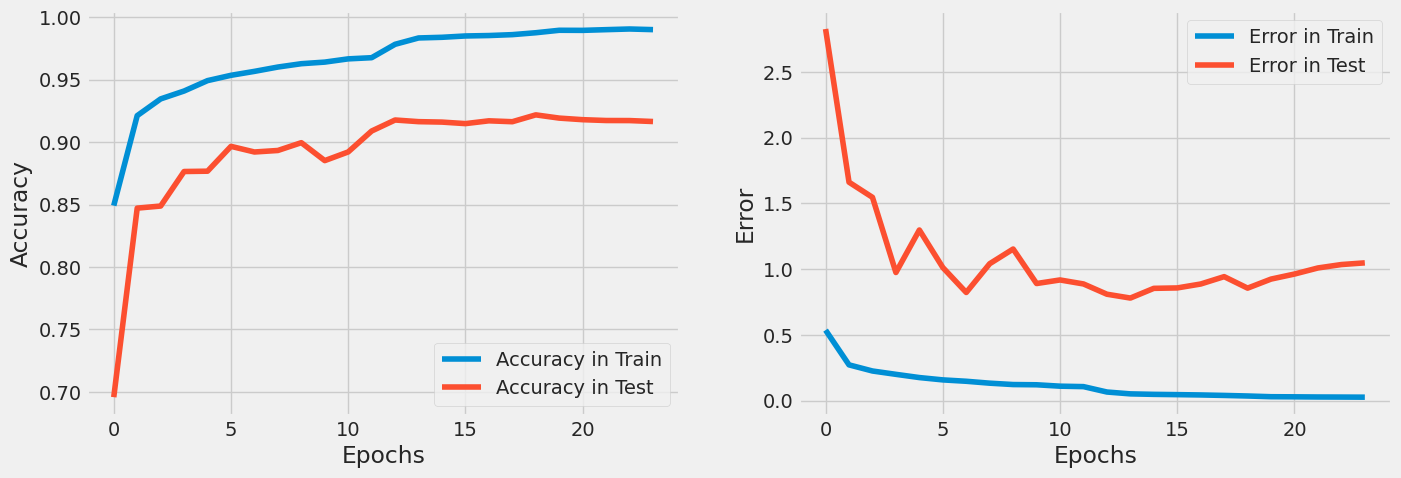

In [ ]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','Accuracy in Test'])
axes[0].grid(True)

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].legend(['Error in Train','Error in Test'])
axes[1].grid(True)

## <a id='step39'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.9 | <b></span><span style="color:#368F8B"><b>Evaluate the Model</b></span></span>

In [ ]:
test_loss, test_acc = model.evaluate_generator(validation_generator)

print(colored(f'Test Loss : {round(test_loss, 3)}', 'green', attrs=['bold']))
print(colored(f'Test Accuracy : {round(test_acc, 3)}', 'green', attrs=['bold']))

<ipython-input-17-f2d153f3164f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = best_model.evaluate_generator(validation_generator)
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Loss : 0.78
Test Accuracy : 0.916


Create Labels from training and Validation daata

In [ ]:
labels = list(train_generator.class_indices.keys())
labels_val=list(validation_generator.class_indices.keys())

Sample Output of the Model's prediction

1/1 [==============================] - 0s 30ms/step


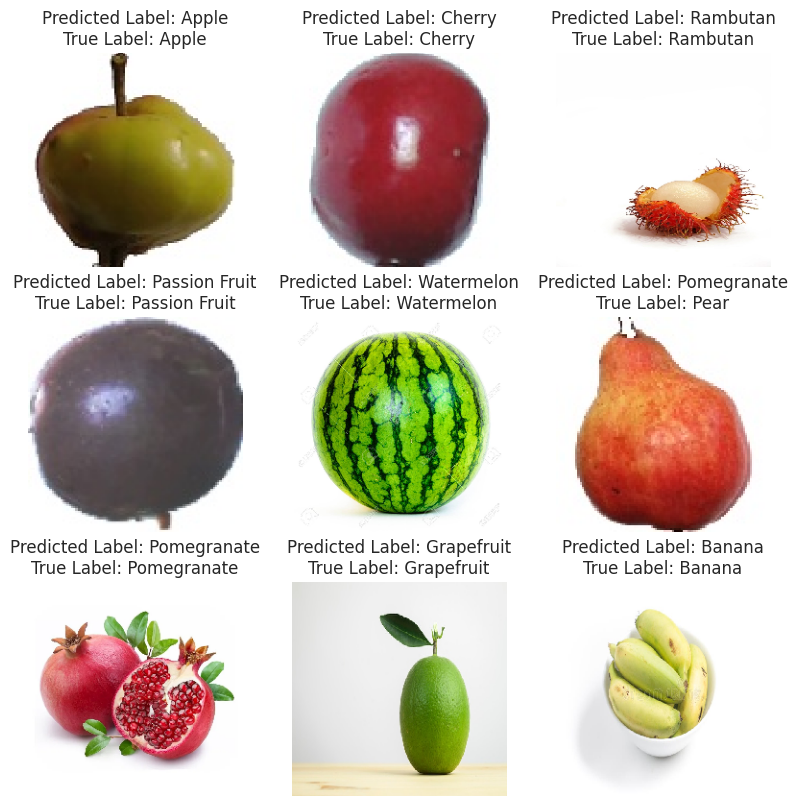

In [ ]:
test_images, test_labels = next(validation_generator)
predictions = best_model.predict(test_images)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes=axes.flatten()
for i,ax in enumerate(axes[:9]):
    predicted_label_index = np.argmax(predictions[i])
    predicted_label = labels_val[predicted_label_index]
    true_label_index = np.argmax(test_labels[i])
    true_label = labels_val[true_label_index]

    ax.imshow(test_images[i])
    ax.set_title(f'Predicted Label: {predicted_label}\nTrue Label: {true_label}',fontsize = 12)
    ax.axis('off')

plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=best_model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

Testing with External data

In [ ]:
img = output('/content/drive/MyDrive/Saved_model/Mob_image_Fruit/Apple.jpeg')
img

1/1 [==============================] - 5s 5s/step


'Apple'

In [ ]:
def evaluate_model_performance(model, val_generator, class_labels):
    """
    Evaluate the model's performance on the validation set and print the classification report.

    Parameters:
    - model: The trained model.
    - val_generator: Validation data generator.
    - class_labels: List of class names.

    Returns:
    - report: Classification report as a string.
    """

    # Getting all the true labels for the validation set
    true_labels = val_generator.classes

    # Get the class labels (names) from the generator
    class_labels = list(val_generator.class_indices.keys())

    # To get the predicted labels, we predict using the model
    predictions = model.predict(val_generator, steps=len(val_generator))

    # Take the argmax to get the predicted class indices.
    predicted_labels = np.argmax(predictions, axis=1)

    # Extracting true labels from the validation generator
    true_labels = val_generator.classes

    # Classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print(report)
    print('\n')

    # Define a custom colormap
    colors = ["white", "#102C42"]
    # cmap_cm = LinearSegmentedColormap.from_list("cmap_cm", colors)

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plotting confusion matrix using seaborn
    plt.figure(figsize=(15,10))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

##Ploting the precision,recall and F1-Score and the Confusion Matrix

617/617 [==============================] - 68s 108ms/step
                    precision    recall  f1-score   support

             Apple       0.90      0.99      0.94      2335
           Apricot       0.91      0.92      0.92       235
           Avocado       1.00      1.00      1.00       309
            Banana       0.93      0.99      0.96       777
         Blueberry       0.97      0.99      0.98       234
      Cactus fruit       0.66      0.94      0.78       274
        Cantaloupe       0.98      0.98      0.98       376
         Carambula       0.98      0.94      0.96       197
            Cherry       0.99      1.00      1.00      1221
        Clementine       1.00      1.00      1.00       166
           Coconut       0.81      0.92      0.86       117
             Cocos       1.00      1.00      1.00       166
             Dates       0.98      0.96      0.97       204
               Fig       0.86      0.97      0.91       325
        Granadilla       0.88      1.00  

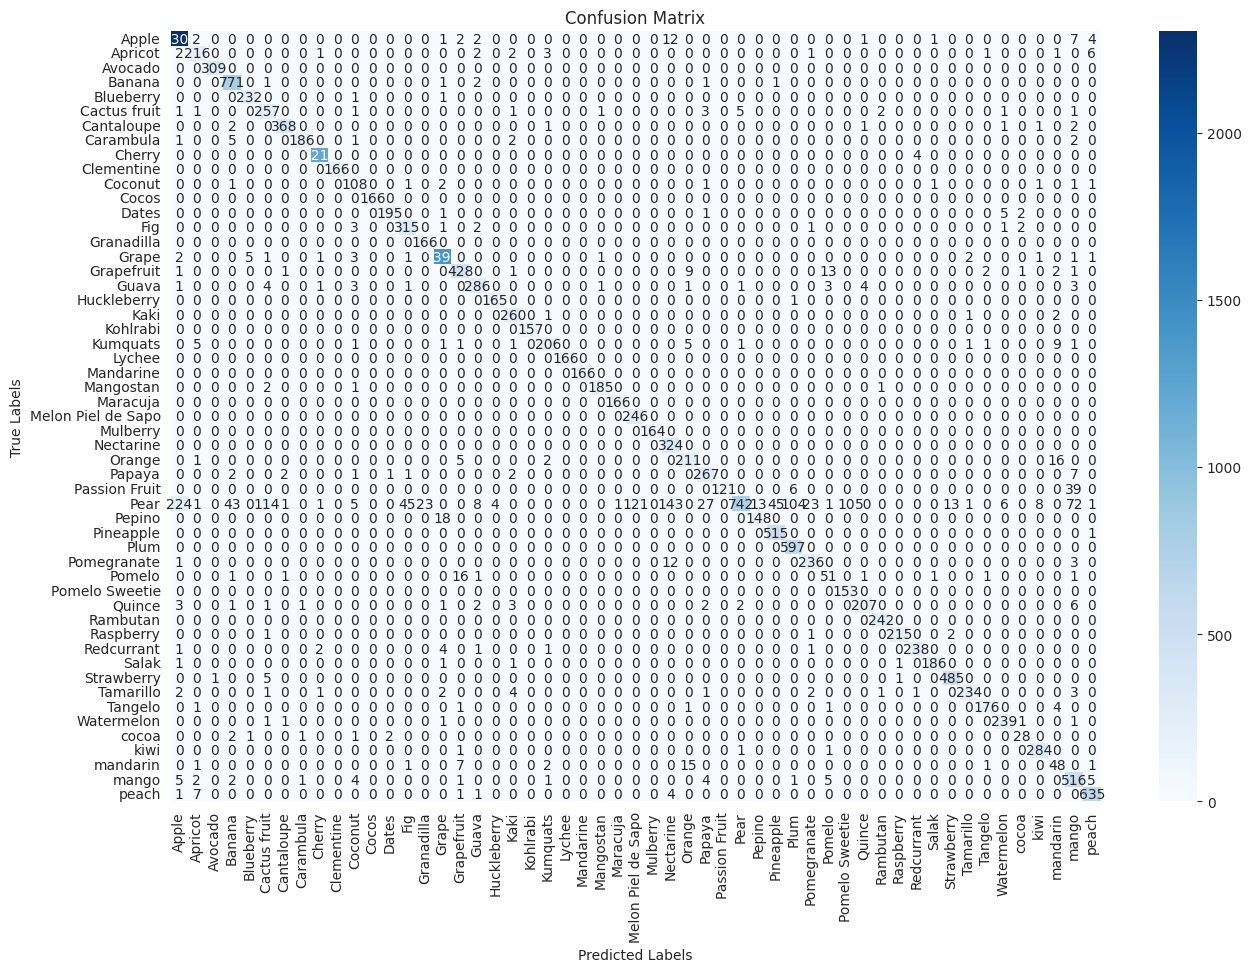

In [ ]:
evaluate_model_performance(model, validation_generator, classes)